In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/predicting-a-pulsar-star/pulsar_stars.csv


In [2]:
dataset=pd.read_csv('/kaggle/input/predicting-a-pulsar-star/pulsar_stars.csv')

In [3]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
dataset.shape


(17898, 9)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

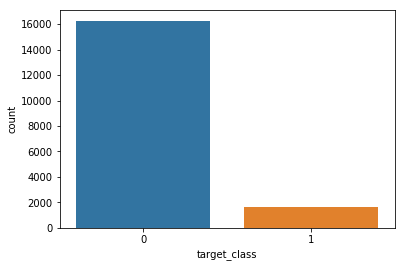

In [6]:
sns.countplot(dataset['target_class'],label='count')

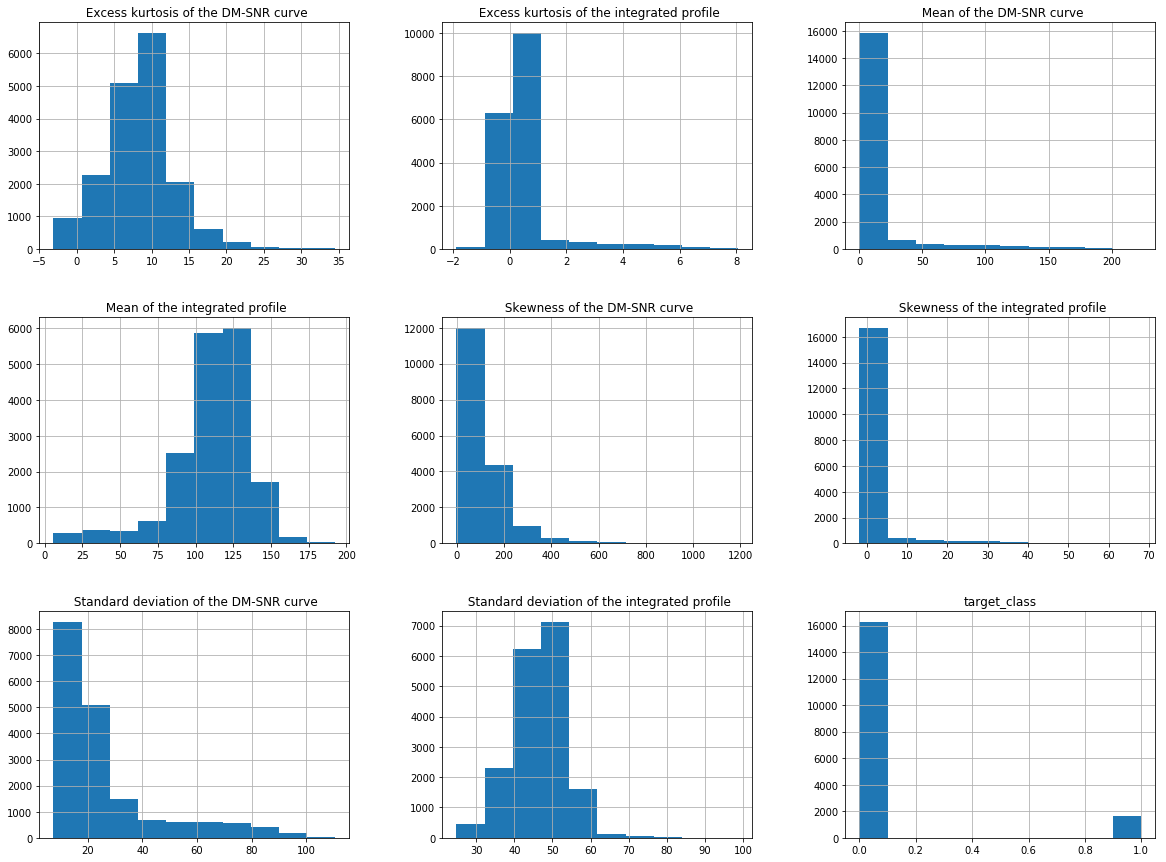

In [7]:
dataset.hist(bins=10,figsize=(20,15))
plt.show()

In [8]:
dataset.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


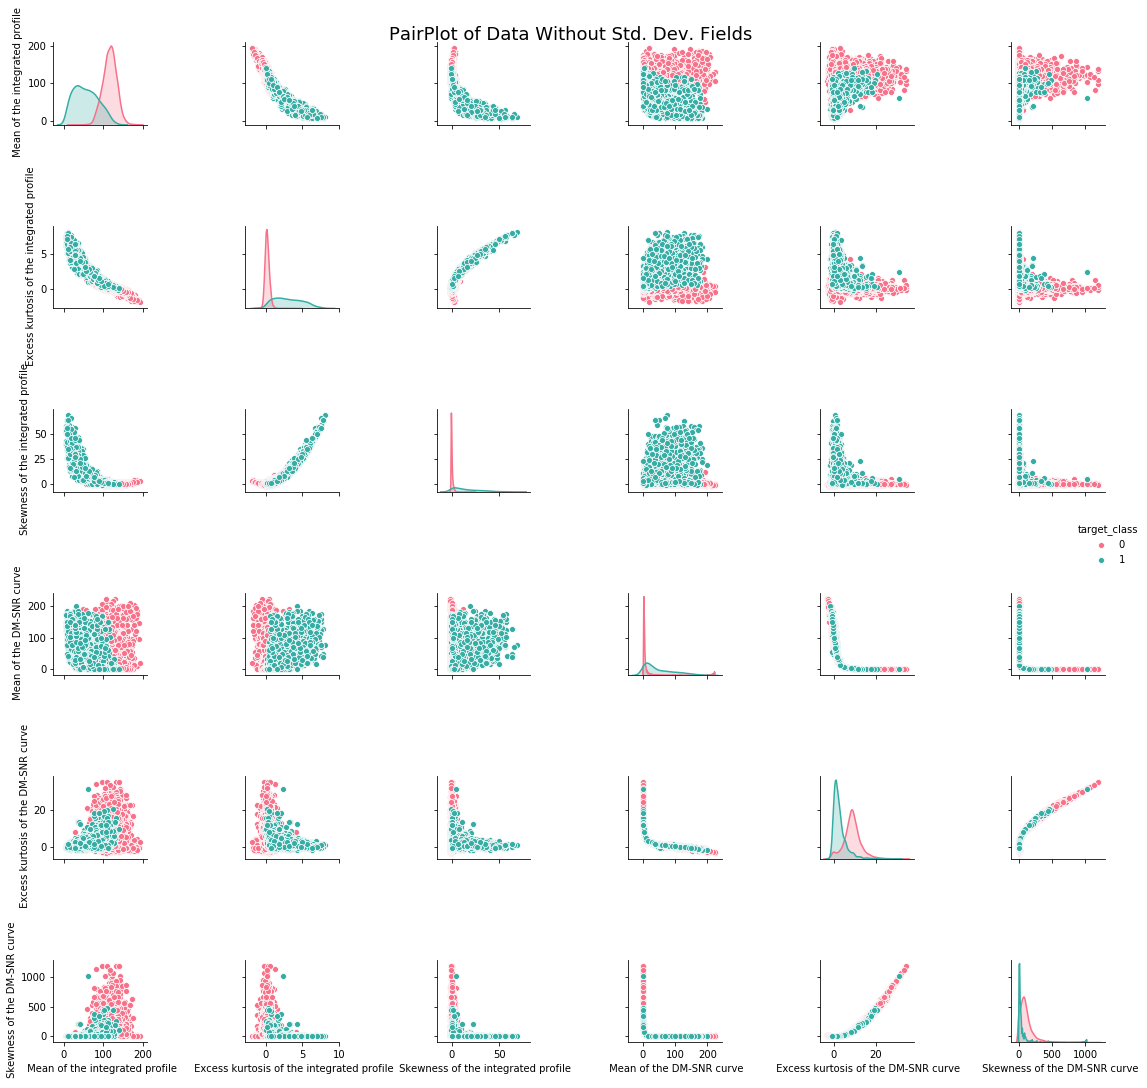

In [9]:
sns.pairplot(data=dataset,
             palette="husl",
             hue="target_class",
             vars=[" Mean of the integrated profile",
                   " Excess kurtosis of the integrated profile",
                   " Skewness of the integrated profile",
                   " Mean of the DM-SNR curve",
                   " Excess kurtosis of the DM-SNR curve",
                   " Skewness of the DM-SNR curve"])

plt.suptitle("PairPlot of Data Without Std. Dev. Fields",fontsize=18)

plt.tight_layout()
plt.show()

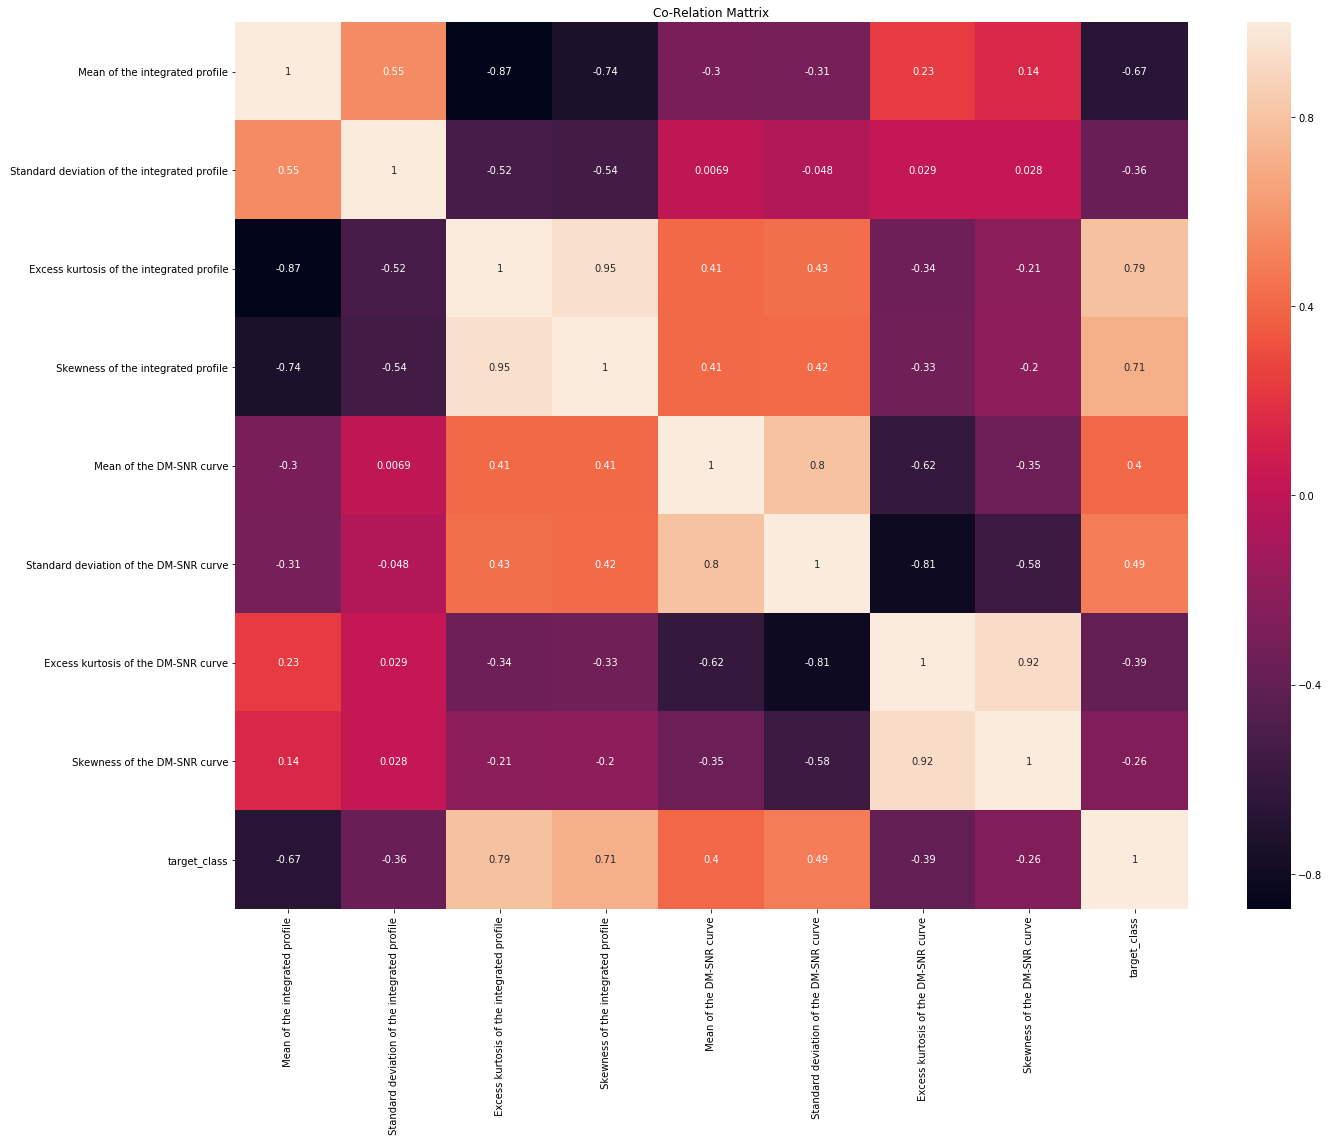

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(data=dataset.corr(),annot=True)
plt.title('Co-Relation Mattrix')
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report

In [12]:
X=dataset.drop('target_class',axis=1)
y=dataset['target_class']

In [13]:
model=DecisionTreeClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
pred=model.predict(X_test)

In [16]:
print(confusion_matrix(y_test,pred))

[[3197   64]
 [  63  256]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3261
           1       0.80      0.80      0.80       319

    accuracy                           0.96      3580
   macro avg       0.89      0.89      0.89      3580
weighted avg       0.96      0.96      0.96      3580



In [18]:
r2_score(y_test,pred)

0.5629357688806345

In [19]:
accuracy_score(y_test,pred)*100

96.45251396648045

In [20]:
df=pd.DataFrame({'Actual Pred':y_test,'Predicted ':pred})
df1=df.head(25)
print(df1)

       Actual Pred  Predicted 
14215            0           0
7755             0           0
13940            0           0
4582             1           1
7157             0           0
3427             0           0
4821             1           1
15174            0           0
12962            0           0
3287             0           0
2627             0           0
17679            0           1
11331            0           0
12781            0           0
3887             0           0
11057            0           0
8188             1           1
586              0           0
12162            0           0
10641            1           1
2061             0           0
391              0           0
10129            1           1
14954            0           0
13449            0           0


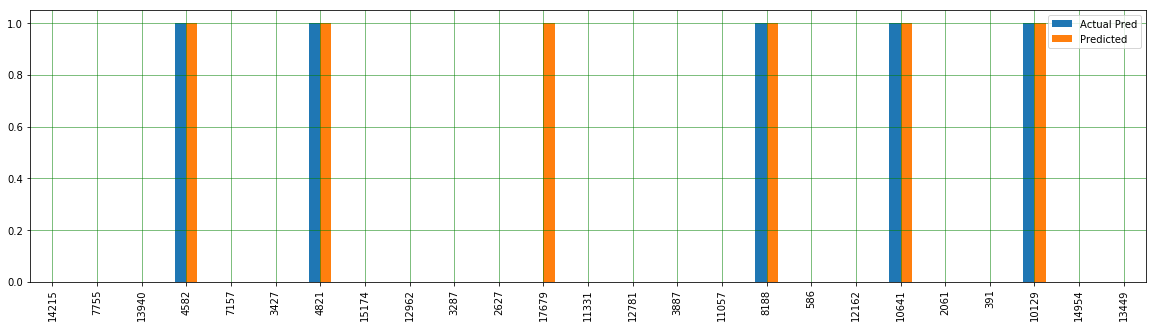

In [21]:
df1.plot(kind='bar',figsize=(20,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
print('Mean absolute Error',metrics.mean_absolute_error(y_test,pred))
print('Mean squared Error',metrics.mean_squared_error(y_test,pred))
print('Mean squared Error',np.sqrt(metrics.mean_absolute_error(y_test,pred)))

Mean absolute Error 0.03547486033519553
Mean squared Error 0.03547486033519553
Mean squared Error 0.1883477112555274


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model2=LogisticRegression()
model2.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred=model2.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[3241   20]
 [  61  258]]


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3261
           1       0.93      0.81      0.86       319

    accuracy                           0.98      3580
   macro avg       0.95      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580



In [27]:
accuracy_score(y_test,y_pred)*100

97.73743016759776

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model3=LinearRegression()
model3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_pred=model3.predict(X_test)

In [31]:
r2_score(y_test,lin_pred)

0.6768206227356635

In [32]:
from sklearn.svm import LinearSVC

In [33]:
model3=LinearSVC(C=1000)

In [34]:
model3.fit(X_train,y_train)
prediction=model3.predict(X_test)

In [35]:
print(confusion_matrix(y_test,prediction))

[[  47 3214]
 [   2  317]]


In [36]:
print(accuracy_score(y_test,prediction)*100)

10.167597765363128


In [37]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.01      0.03      3261
           1       0.09      0.99      0.16       319

    accuracy                           0.10      3580
   macro avg       0.52      0.50      0.10      3580
weighted avg       0.88      0.10      0.04      3580

